In [1]:
# IMPORTING LIBRARIES  :

import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt 
import seaborn as sns
from statsmodels import robust

%matplotlib inline

# *OBJECTIVE :* 

### *CLASSIFY A PATIENT TO EITHER CANCER SURVIVED OR NOT, AFTER OPERATION*

In [2]:
# READING THE CSV AS DATAFRAME :

haberman = pd.read_csv(r"haberman.csv")

# HEAD VIEW HABERMAN DATAFRAME (TOP 5 ROWS) :

haberman.head()

,age,operation_year,axil_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# DATA TYPES FOR EACH FEATURE :

haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age               306 non-null int64
operation_year    306 non-null int64
axil_nodes        306 non-null int64
status            306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


> <h3> TOTAL 306 DATA POINTS  </h3>

> <h3> FEATURE 1  : 'age' : 306 POINTS (INTEGER TYPE)  </h3>
> <h3> FEATURE 2  : 'operation_year' : 306 POINTS (INTEGER TYPE) </h3>  
> <h3> FEATURE 3  : 'axil_nodes' : 306 POINTS (INTEGER TYPE) </h3> 
> <h3> FEATURE 4  : 'status' : 306 POINTS (INTEGER TYPE - CATEGORY VARIABLE) </h3> 

In [4]:
# CHECKING FOR NULL PRESENCE :

haberman.isnull().sum()

age               0
operation_year    0
axil_nodes        0
status            0
dtype: int64

> <h3> NO NULL (NaN) PRESENCE </h3>

In [5]:
# OVERVIEW DESCRIPTION OF THE DATASET :

haberman.describe()

,age,operation_year,axil_nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [6]:
# DIMESNIONALITY OF THE DATASET :

haberman.shape

(306, 4)

> <h3> Total Data Points = 3016 </h3> 
> <h3> Total Features = 4 </h3> 

In [7]:
# COLUMNS OF THE DATASET :

haberman.columns

Index(['age', 'operation_year', 'axil_nodes', 'status'], dtype='object')

In [8]:
# TARGET FEATURE - 'STATUS':

# NO OF VALUES PER CATEGORY 

haberman.status.value_counts()

1    225
2     81
Name: status, dtype: int64

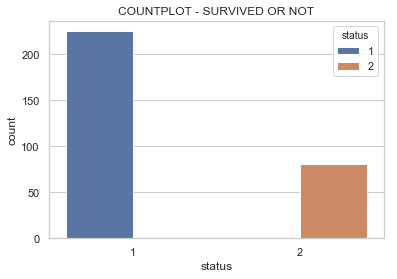

In [46]:
plt.title('COUNTPLOT - SURVIVED OR NOT')
sns.countplot(haberman.status, hue=haberman.status)

> <h4> Category 1 = 225 </h4> 
> <h4> Category 0 = 81 </h4>

In [10]:
# TIME SERIES :
# CONVERTING ALL THE OPERATION YEAR TO PANDAS TIMESERIES AS WE SHALL UTILIZE THE YEAR FOR GENERATING SERIES PLOTS

# The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
# SOURCE OF INFO :'https://www.kaggle.com/gilsousa/habermans-survival-data-set'


haberman['operation_year'] = haberman['operation_year'] + 1900
haberman.sort_values(by='operation_year', inplace=True)
haberman.head()

,age,operation_year,axil_nodes,status
305,83,1958,2,2
258,65,1958,0,2
253,64,1958,0,1
37,39,1958,0,1
40,40,1958,2,1


# UNIVARIATE ANALYSIS :

c:\users\shubhendra kumar\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


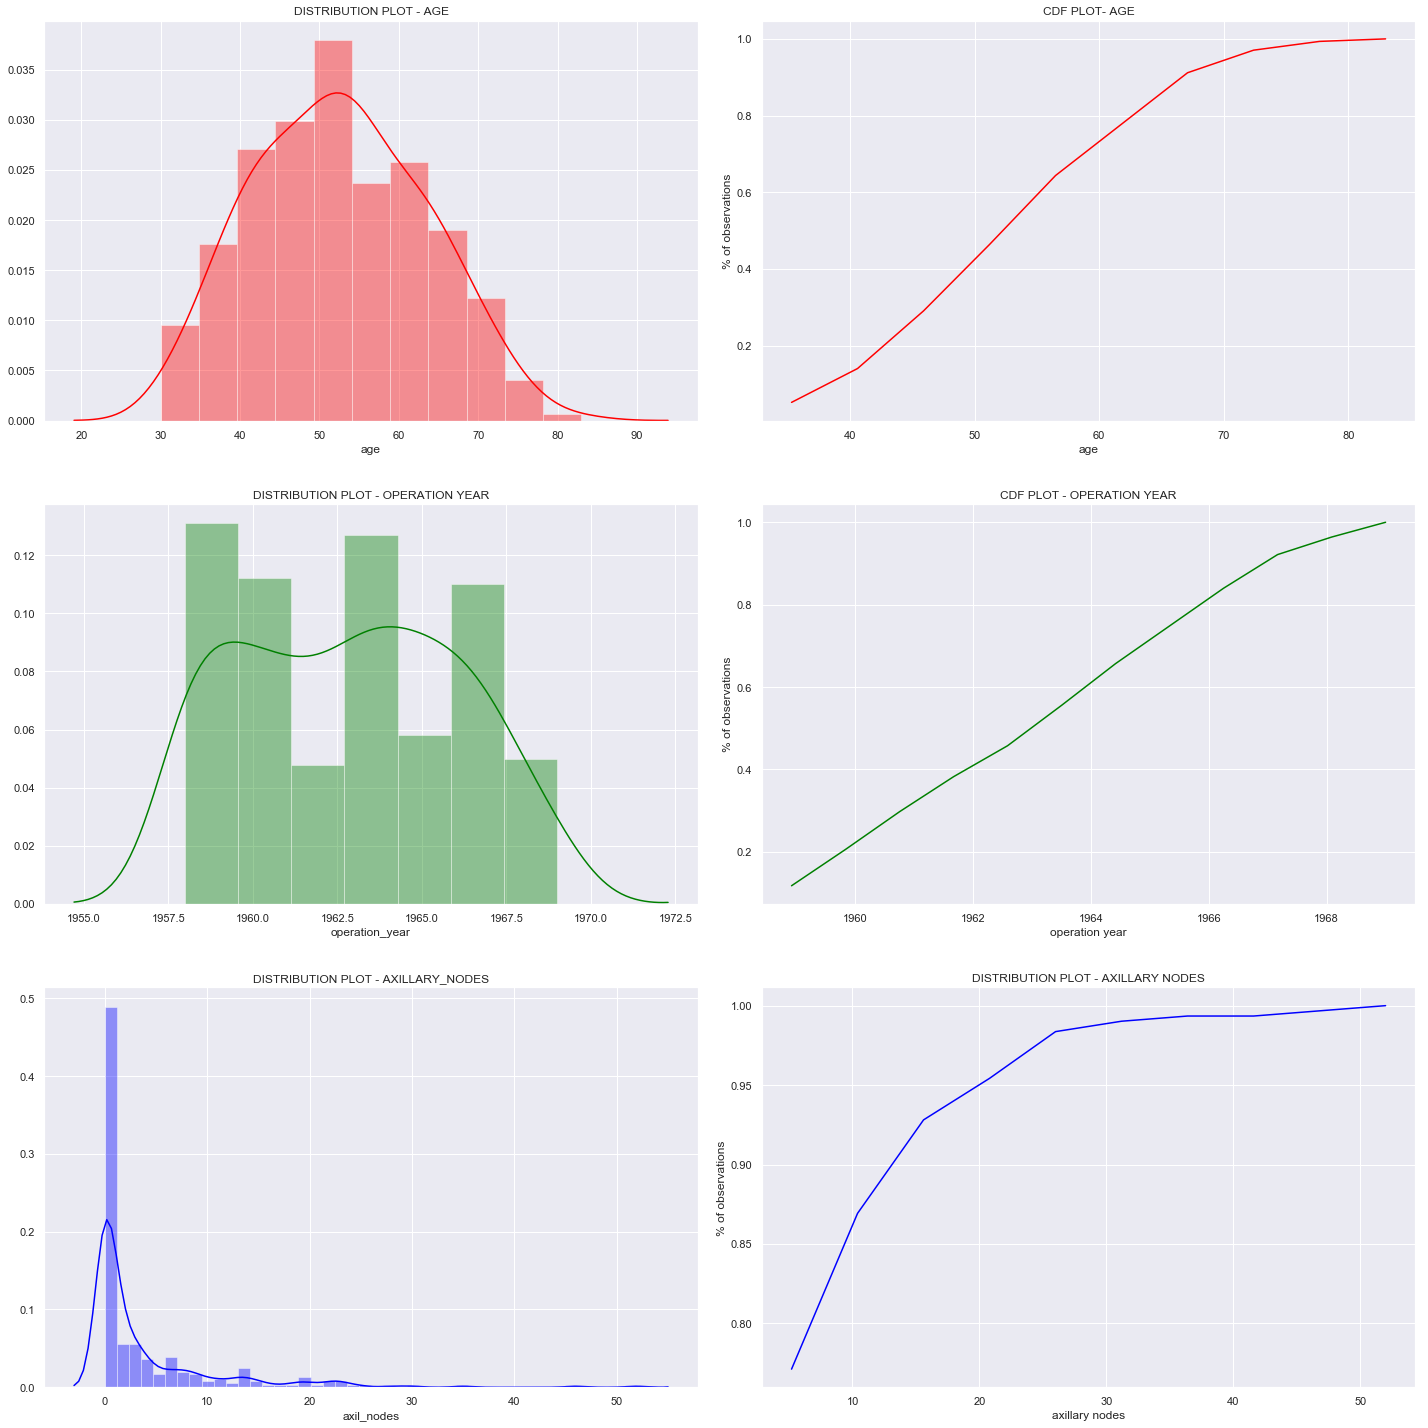

In [11]:
# PDFs and CDFs FOR EACH FEATURE :

plt.figure(figsize=(20, 20))
sns.set()
plt.subplot(3,2,1)
plt.title('DISTRIBUTION PLOT - AGE')
sns.distplot(haberman['age'], color='red') # DISTRIBUTION PLOT - 'AGE'


plt.subplot(3,2,2)
freq1, bin_edges1 = np.histogram(haberman.age)
cumulative_prob = np.cumsum(freq1/(sum(freq1)))
plt.title('CDF PLOT- AGE')
plt.xlabel('age')
plt.ylabel('% of observations')
plt.plot(bin_edges1[1:], cumulative_prob, color='red')    # CDF PLOT - 'AGE'
# plt.plot(bin_edges1[1:], freq1/sum(freq1), color='black')    # PDF PLOT - 'AGE'


plt.tight_layout(h_pad=3)

plt.subplot(3,2,3)
plt.title('DISTRIBUTION PLOT - OPERATION YEAR')
sns.distplot(haberman['operation_year'], color='green') # DISTRIBUTION PLOT - 'OPERATION YEAR'


plt.subplot(3,2,4)
freq2, bin_edges2 = np.histogram(haberman.operation_year, bins=12)
cumulative_prob = np.cumsum(freq2/(sum(freq2)))
plt.title('CDF PLOT - OPERATION YEAR')
plt.xlabel('operation year')
plt.ylabel('% of observations')
plt.plot(bin_edges2[1:] , cumulative_prob, color='green')  # CDF PLOT - 'OPERATION YEAR'
# plt.plot(bin_edges2[1:], freq2/sum(freq2), color='black')      # PDF PLOT - 'OPERATION YEAR'

plt.tight_layout(h_pad=3)


plt.subplot(3,2,5)
plt.title('DISTRIBUTION PLOT - AXILLARY_NODES')
sns.distplot(haberman['axil_nodes'], color='blue') # DISTRIBUTION PLOT - 'AXILLARY NODES'


plt.subplot(3,2,6)
freq3, bin_edges3 = np.histogram(haberman.axil_nodes)
cumulative_prob = np.cumsum(freq3/(sum(freq3)))
plt.title('DISTRIBUTION PLOT - AXILLARY NODES')
plt.xlabel('axillary nodes')
plt.ylabel('% of observations')
plt.plot(bin_edges3[1:], cumulative_prob, color='blue')    # CDF PLOT - 'AXILLARY NODES'
# plt.plot(bin_edges3[1:], freq3/sum(freq3), color='black')    # PDF PLOT - 'AXILLARY NODES'

plt.tight_layout(h_pad=3)

### AGE : 

+ Age distribution tends to follow a somewhat a normal distribution with median at somewhere 53

+ 80 % of the observations are <= ~63 years of age

+ 50% of the observations have age <= 50 years

### OPERATION YEAR : 

+ The cdf for operation year follows a gradual linear line relationship i.e there are nearly fixed number of observations b/w 2 operation year having a gap of 2 years 

+ 60 % of the operations were performed before or on 1964

### AXILLARY NODES : 

+ The general distribution for axillary nodes follow a right skewed gaussian distribution or somewhat log normal distn.
+ 90 % of the operations or patients contained <= ~14 axillary nodes

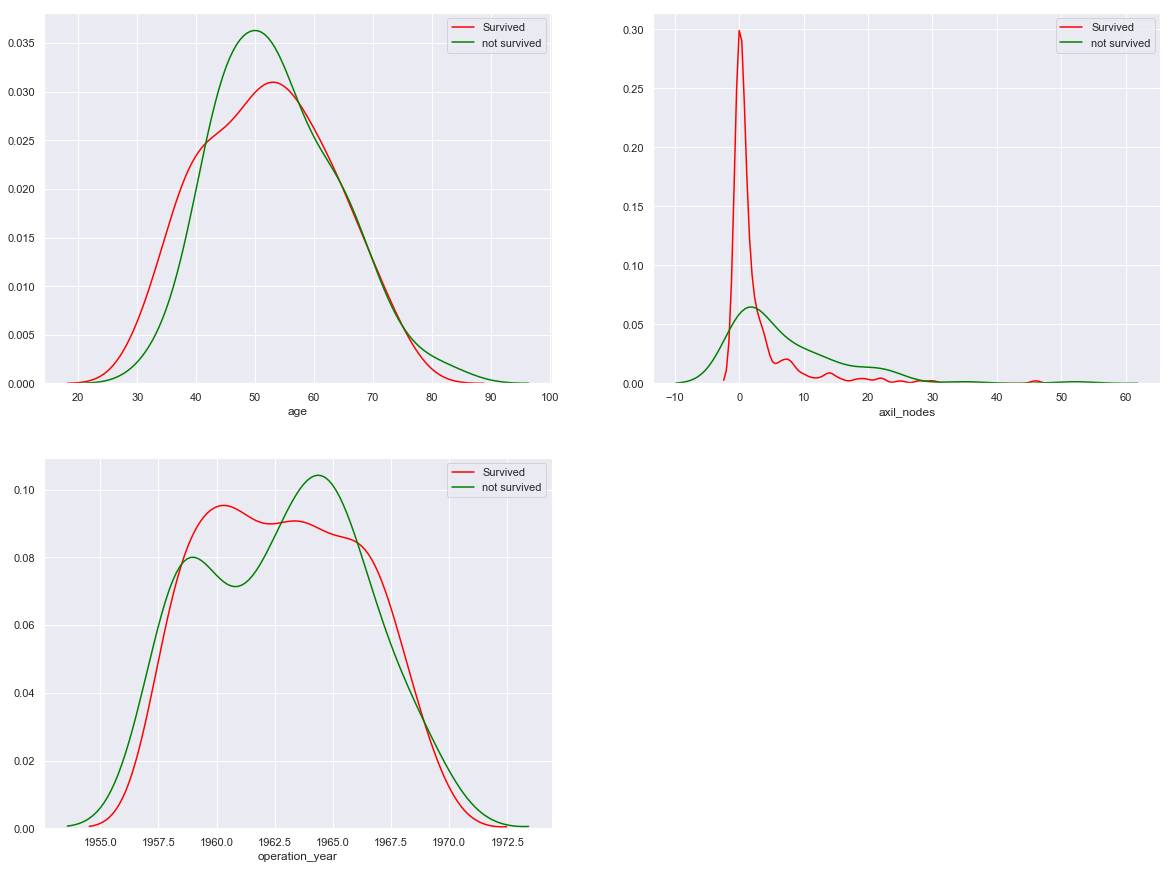

In [12]:
# KDE PLOT FOR EACH CLASS ON SEPARATE FEATURES :

plt.figure(figsize=(20, 15))

plt.subplot(2,2,1)
sns.distplot(haberman[haberman['status']==1]['age'], color='red', hist=False, label='Survived')
sns.distplot(haberman[haberman['status']==2]['age'], color='green', hist=False, label='not survived')

plt.subplot(2,2,2)
sns.distplot(haberman[haberman['status']==1]['axil_nodes'], color='red', hist=False, label='Survived')
sns.distplot(haberman[haberman['status']==2]['axil_nodes'], color='green', hist=False, label='not survived')

plt.subplot(2,2,3)
sns.distplot(haberman[haberman['status']==1]['operation_year'], color='red', hist=False, label='Survived')
sns.distplot(haberman[haberman['status']==2]['operation_year'], color='green', hist=False, label='not survived')

### Observations : 

+ Using a single feature alone i.e. 'age' or 'axillary nodes' or 'operation_year', classification b/w SURVIVED or NOT SURVIVED cannot be brought into light.

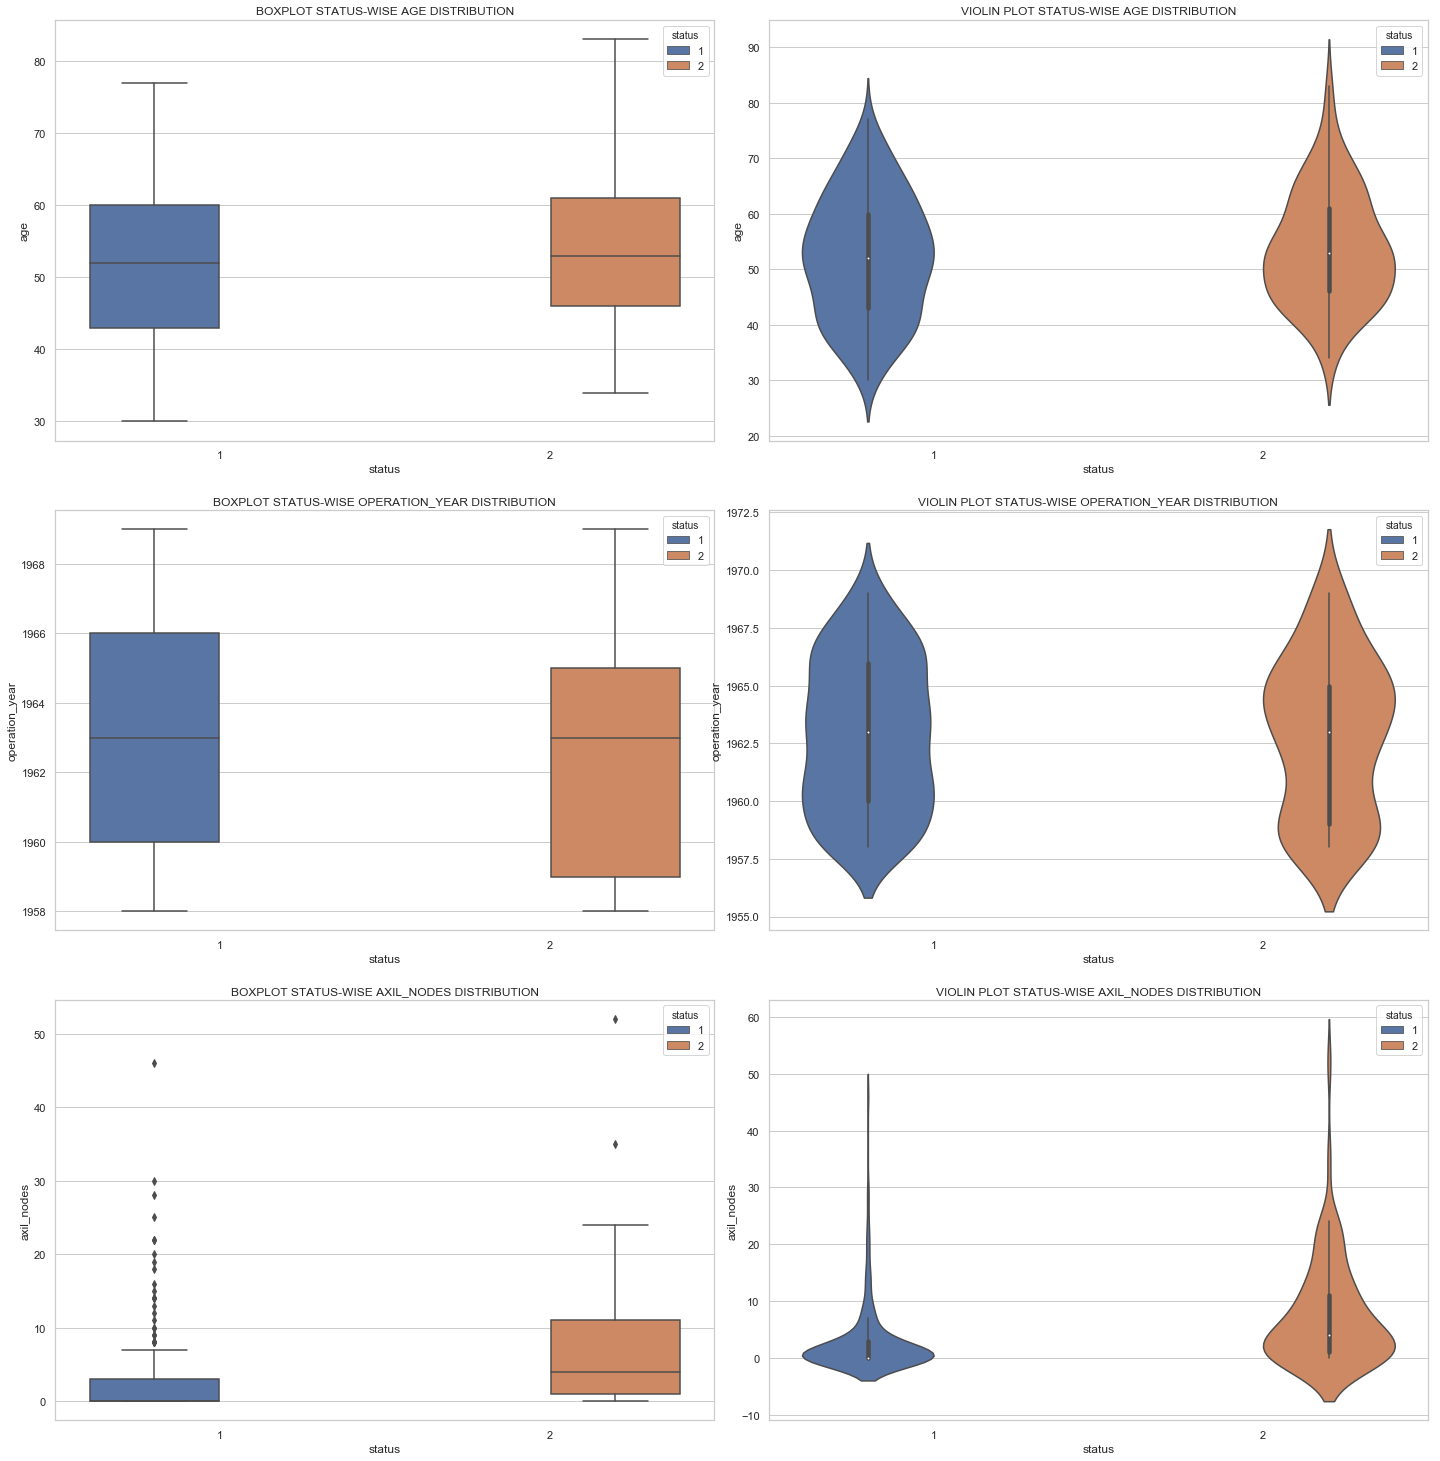

In [45]:
# BOXPLOTS AND VIOLEN PLOTS :

plt.figure(figsize=(20, 20))

plt.subplot(3,2,1)
plt.title('BOXPLOT STATUS-WISE AGE DISTRIBUTION')
sns.boxplot(data=haberman, x='status', y='age', hue='status')


plt.subplot(3,2,2)
plt.title('VIOLIN PLOT STATUS-WISE AGE DISTRIBUTION')
sns.violinplot(data=haberman, x='status', y='age', hue='status')


plt.tight_layout(h_pad=3)

plt.subplot(3,2,3)
plt.title('BOXPLOT STATUS-WISE OPERATION_YEAR DISTRIBUTION')
sns.boxplot(data=haberman, x='status', y='operation_year', hue='status')


plt.subplot(3,2,4)
plt.title('VIOLIN PLOT STATUS-WISE OPERATION_YEAR DISTRIBUTION')
sns.violinplot(data=haberman, x='status', y='operation_year', hue='status')



plt.subplot(3,2,5)
plt.title('BOXPLOT STATUS-WISE AXIL_NODES DISTRIBUTION')
sns.boxplot(data=haberman, x='status', y='axil_nodes', hue='status')


plt.subplot(3,2,6)
plt.title('VIOLIN PLOT STATUS-WISE AXIL_NODES DISTRIBUTION')
sns.violinplot(data=haberman, x='status', y='axil_nodes', hue='status')

### OBSERVATIONS  : 

#### AGE :

+ More Patients b/w the age of 40 and 60, didn't survive after the operation.


+ Also patients above the age of almost 80 faced no survival. 

#### OPERATION YEAR :

+ Operations b/w 1962 and 1968, led to more no of deaths, than any other, followed by operations done b/w 1958 and 1960.

#### AXILLARY NODES :

+ Patients containing more no of axilllary nodes stand at more chances of not surviving i.e patients containing axillary nodes b/w 0 and 5, majorily survived, whereas patients containing above 10 axillary nodes witnessed no survival in general.


+ 1st quantile and 2nd quantile is same for survived patients i.e 0 as no. of axillary nodes and on the other hand 2nd quantile and 3rd quantile shows a large difference for those who didn't survive.


+ *This can lay the foundation of a classification based approach i.e people having more no. of axillary nodes stands at higher chance of death risk and with low no of axillary nodes may survive(usually <=5)* 

In [14]:
# MEASUREMENT OF CENTRAL TENDENCY :

# MEAN :
print('Mean Value for age ', haberman.age.mean())
print('Mean Value for operation_year ', haberman.operation_year.mean())
print('Mean Value for axillary_mean ', haberman.axil_nodes.mean())

print()

# MEDIAN :
print('Median Value for age ', haberman.age.median())
print('Median Value for operation_year ', haberman.operation_year.median())
print('Median Value for axillary_mean ', haberman.axil_nodes.median())

print()

# STANDARD DEVIATION :
print('Std Deviation Value for age ', haberman.age.std())
print('Std Deviation Value for operation_year ', haberman.operation_year.std())
print('Std Deviation Value for axillary_mean ', haberman.axil_nodes.std())

Mean Value for age  52.45751633986928
Mean Value for operation_year  1962.8529411764705
Mean Value for axillary_mean  4.026143790849673

Median Value for age  52.0
Median Value for operation_year  1963.0
Median Value for axillary_mean  1.0

Std Deviation Value for age  10.80345234930328
Std Deviation Value for operation_year  3.2494046632238502
Std Deviation Value for axillary_mean  7.189653506248555


In [15]:
# QUANTILES :

# 25th PERCENTILE, 50th PERCENTILE, 75TH PERCENTILE, IQR :
print('25th percentile for age ', np.percentile(a=haberman.age, q=25))
print('50th percentile for age ', np.percentile(a=haberman.age, q=50))
print('75th percentile for age ', np.percentile(a=haberman.age, q=75))
print('Inter Quartile Range ', np.percentile(a=haberman.age, q=75) - np.percentile(a=haberman.age, q=25))

print()

# # 25th PERCENTILE, 50th PERCENTILE, 75TH PERCENTILE, IQR :
# print('25th percentile for operation_year ', np.percentile(a=haberman.operation_year, q=25))
# print('50th percentile for operation_year ', np.percentile(a=haberman.operation_year, q=50))
# print('75th percentile for operation_year ', np.percentile(a=haberman.operation_year, q=75))
# print('Inter Quartile Range ', np.percentile(a=haberman.operation_year, q=75) - np.percentile(a=haberman.operation_year, q=25))

print()

# 25th PERCENTILE, 50th PERCENTILE, 75TH PERCENTILE, IQR :
print('25th percentile for axil_nodes ', np.percentile(a=haberman.axil_nodes, q=25))
print('50th percentile for axil_nodes ', np.percentile(a=haberman.axil_nodes, q=50))
print('75th percentile for axil_nodes ', np.percentile(a=haberman.axil_nodes, q=75))
print('Inter Quartile Range ', np.percentile(a=haberman.axil_nodes, q=75) - np.percentile(a=haberman.axil_nodes, q=25))

25th percentile for age  44.0
50th percentile for age  52.0
75th percentile for age  60.75
Inter Quartile Range  16.75


25th percentile for axil_nodes  0.0
50th percentile for axil_nodes  1.0
75th percentile for axil_nodes  4.0
Inter Quartile Range  4.0


In [16]:
# DICTINARY TO HOLD QUANTILES Q1, Q2, Q3 AND MEDIAN ABSOLUTE DEVIATION :

dict_quantiles = {}


dict_quantiles['Quantiles'] = ['25th %ile', '50th %ile', '75th %ile', 'IQR', 'MAD']

dict_quantiles['age'] = [np.percentile(a=haberman.age, q=25), 
                               np.percentile(a=haberman.age, q=50), 
                               np.percentile(a=haberman.age, q=75),
                            np.percentile(a=haberman.age, q=75) - np.percentile(a=haberman.age, q=25), 
                            robust.mad(haberman.age)]


# dict_quantiles['operation_year'] = [np.percentile(a=haberman.operation_year, q=25), 
#                                np.percentile(a=haberman.operation_year, q=50), 
#                                np.percentile(a=haberman.operation_year, q=75), 
#                                    np.percentile(a=haberman.operation_year, q=75) - np.percentile(a=haberman.operation_year, q=25),
#                                    robust.mad(haberman.operation_year)]


dict_quantiles['axillary_nodes'] = [np.percentile(a=haberman.axil_nodes, q=25), 
                               np.percentile(a=haberman.axil_nodes, q=50), 
                               np.percentile(a=haberman.axil_nodes, q=75),
                                   np.percentile(a=haberman.axil_nodes, q=75) - np.percentile(a=haberman.axil_nodes, q=25), 
                                   robust.mad(haberman.axil_nodes)]


In [17]:
# DATAFRAME FOR STORING QUANTILES FOR 'AGE', 'OPERATION_YEAR', 'AXILLARY_NODES'

quantile_df = pd.DataFrame(dict_quantiles)
quantile_df

,Quantiles,age,axillary_nodes
0,25th %ile,44.000000,0.000000
1,50th %ile,52.000000,1.000000
2,75th %ile,60.750000,4.000000
3,IQR,16.750000,4.000000
4,MAD,11.860818,1.482602


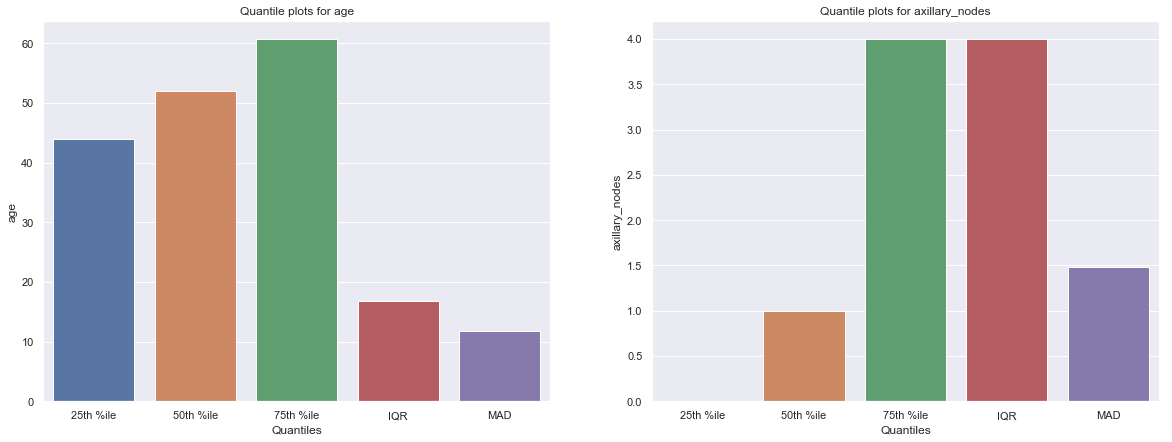

In [18]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2 ,1)
plt.title('Quantile plots for age')
sns.barplot(data=quantile_df, y='age', x='Quantiles')


# plt.subplot(1, 2 ,2)
# plt.title('Quantile plots for operation_year')
# sns.barplot(data=quantile_df, y='operation_year', x='Quantiles')

plt.subplot(1, 2 , 2)
plt.title('Quantile plots for axillary_nodes')
sns.barplot(data=quantile_df, y='axillary_nodes', x='Quantiles')

### OBSERVATIONS : 

+ For axillary_nodes, 25th %ile lies at 0 i.e. 25% of the observations are <= 0,and since there cannot be -ve no of axillary nodes, therefore first 25% of the values are 0 itself.


+ Hence Median absolute deviation (= ~1.5) is also high for axillary_nodes 

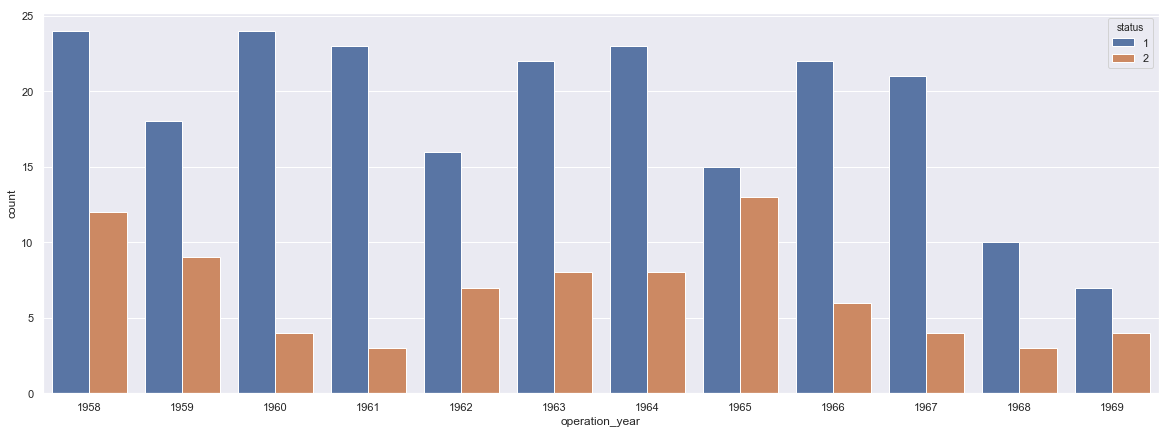

In [19]:
# OPERATIONS PERFORMED DURING EACH YEAR WITH 'PATIENT SURVIVAL' OR 'NOT' :
# 1 - SURVIVED
# 2 - NOT SURVIVED

plt.figure(figsize=(20, 7))
sns.countplot(x='operation_year',  data=haberman,  hue='status')

### OBSERVATIONS : 

+ The no of deaths decreased from 1958 to 1962 and then gradually increased from 1962 to 1965 and then decreased with the numbers being the least as compared to all previous no of deaths.


+ This may suggest advances in the operation/surgery technique leading to better survival outcomes in the late part of 1966-1970.

In [20]:
# WE SHALL DEVELOP A DATAFRAME WHERE WE WILL TAKE INTO ACCOUNT THE NO OF DEATHS AND SURVIVAL DEPENDING ON THE BASIS OF 
# HOW MANY AXILLARY NODES WERE CONTAINED BY THE PATIENT


classification_on_axillary_nodes_model = haberman

# AS WE SAW FROM THE VIOLIN/BOX PLOTS THAT PEOPLE WITH AXILLARY NODES B/W 0 AND 8 STOOD AT A GOOD CHANCE OF SURVIVAL BUT AS THE 
# NO OF AXILLARY NODES INCREASED, SURVIVAL RATE DECREASED.

# ASSUME THAT THE SAFE LIMIT FOR THE NUMBER OF AXILLARY NODES IS '8', THEN :

classification_on_axillary_nodes_model['axil_nodes > 8'] = None

# 0 - NO OF AXILLARY NODES < 8 :
# 1 - NO OF AXILLARY NODES < 8 :

classification_on_axillary_nodes_model.loc[classification_on_axillary_nodes_model['axil_nodes'] > 8, 'axil_nodes > 8'] = 'YES'
classification_on_axillary_nodes_model.loc[classification_on_axillary_nodes_model['axil_nodes'] <= 8, 'axil_nodes > 8'] = 'NO'

In [21]:
# DATAFRAME HEAD

classification_on_axillary_nodes_model.head()

,age,operation_year,axil_nodes,status,axil_nodes > 8
305,83,1958,2,2,NO
258,65,1958,0,2,NO
253,64,1958,0,1,NO
37,39,1958,0,1,NO
40,40,1958,2,1,NO


In [22]:
# DATAFRAME TAIL

classification_on_axillary_nodes_model.tail()

,age,operation_year,axil_nodes,status,axil_nodes > 8
176,54,1969,7,1,NO
53,42,1969,1,2,NO
142,52,1969,3,2,NO
50,41,1969,8,1,NO
90,46,1969,3,2,NO


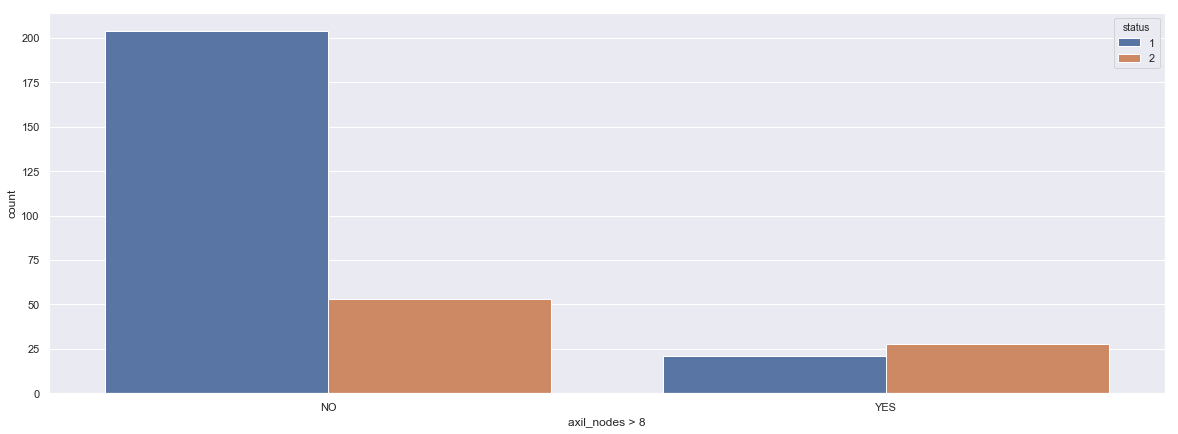

In [23]:
# COUNTPLOT

plt.figure(figsize=(20, 7))
sns.countplot(hue='status', data=classification_on_axillary_nodes_model, x='axil_nodes > 8')

### OBSERVATIONS : 

+ Considering patients with axillary_nodes <= 8, the survival rate is pretty high (more than 175 patients).


+ Considering patients with axillary_nodes > 8, the survival rate decreases.

# BIVARIATE ANALYSIS :

In [24]:
# LOADING ONCE AGAIN THE SAME DATASET :

haberman = pd.read_csv(r"haberman.csv")

In [25]:
# TIME SERIES :
# CONVERTING ALL THE OPERATION YEAR TO PANDAS TIMESERIES AS WE SHALL UTILIZE THE YEAR FOR GENERATING SERIES PLOTS

# The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
# SOURCE OF INFO :'https://www.kaggle.com/gilsousa/habermans-survival-data-set'


haberman['operation_year'] = haberman['operation_year'] + 1900
haberman.sort_values(by='operation_year', inplace=True)
haberman.head()

,age,operation_year,axil_nodes,status
305,83,1958,2,2
258,65,1958,0,2
253,64,1958,0,1
37,39,1958,0,1
40,40,1958,2,1


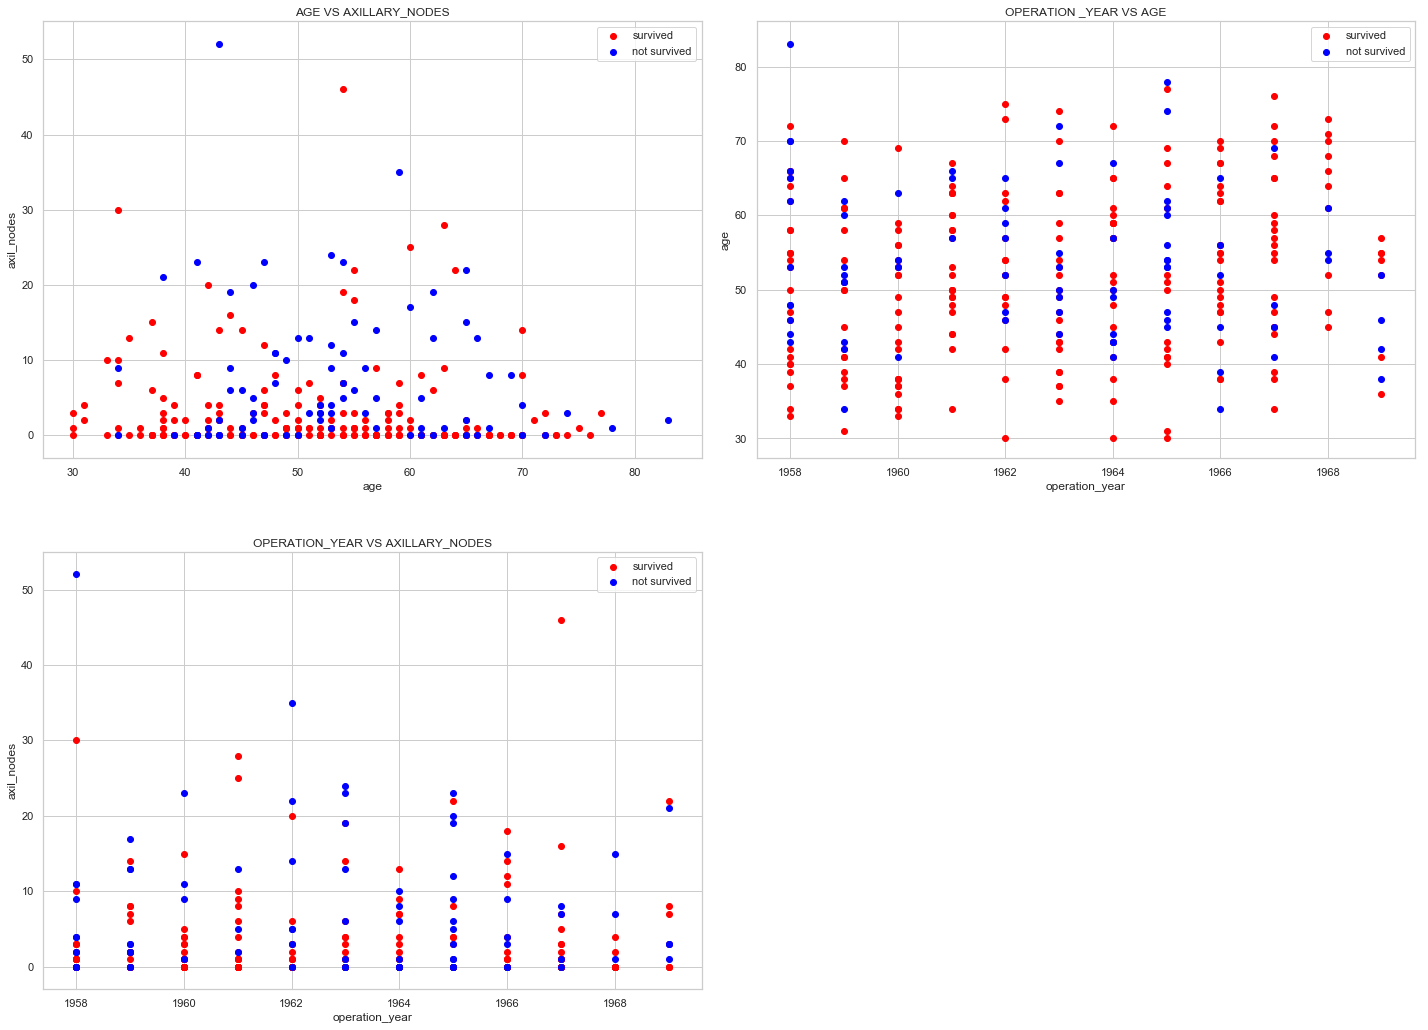

In [26]:
# 2D SCATTER PLOTS :


haberman.sort_values(by='age', inplace=True)

sns.set(style='whitegrid')
plt.figure(figsize=(20, 14))

# SCATTER PLOT B/W AGE AND AXILLARY NODES (WITH CLASSES SEPARATELY COLORED) 

plt.subplot(2,2,1)
plt.title('AGE VS AXILLARY_NODES')
plt.xlabel('age')
plt.ylabel('axil_nodes')
plt.scatter(haberman[haberman['status']==1]['age'], haberman[haberman['status']==1]['axil_nodes'], c='red', label='survived')
plt.scatter(haberman[haberman['status']==2]['age'], haberman[haberman['status']==2]['axil_nodes'], c='blue', label='not survived')
plt.legend()


# SCATTER PLOT B/W OPERATION_YEAR AND AGE NODES (WITH CLASSES SEPARATELY COLORED) 

plt.subplot(2,2,2)
plt.title('OPERATION _YEAR VS AGE')
plt.xlabel('operation_year')
plt.ylabel('age')
plt.scatter(haberman[haberman['status']==1]['operation_year'], haberman[haberman['status']==1]['age'], c='red', label='survived')
plt.scatter(haberman[haberman['status']==2]['operation_year'], haberman[haberman['status']==2]['age'], c='blue', label='not survived')
plt.legend()


plt.tight_layout(h_pad=5)

# SCATTER PLOT B/W OPERATION_YEAR AND AXILLARY NODES (WITH CLASSES SEPARATELY COLORED) 

plt.subplot(2,2,3)
plt.title('OPERATION_YEAR VS AXILLARY_NODES')
plt.xlabel('operation_year')
plt.ylabel('axil_nodes')
plt.scatter(haberman[haberman['status']==1]['operation_year'], haberman[haberman['status']==1]['axil_nodes'], c='red', label='survived')
plt.scatter(haberman[haberman['status']==2]['operation_year'], haberman[haberman['status']==2]['axil_nodes'], c='blue', label='not survived')
plt.legend()

In [27]:
# CORRELATIONS :

In [28]:
haberman['age'].corr(haberman['operation_year'])

0.08952944559093896

In [29]:
haberman['age'].corr(haberman['axil_nodes'])

-0.0631761023898006

In [30]:
haberman['operation_year'].corr(haberman['axil_nodes'])

-0.0037644741718608453

### OBSERVATIONS : 

+ No definite inference can be drawn from the 2d scatter plots.


+ The correlation b/w the features also cannot provide for sufficient reasoning :



+ 'age'   VS   'operation_year' = 0.08952944559093903

+ 'age'   VS   'axil_nodes' = -0.0631761023898006

+ 'operation_year'   VS   'axil_nodes' =  -0.0037644741718608453

c:\users\shubhendra kumar\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
c:\users\shubhendra kumar\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\shubhendra kumar\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
c:\users\shubhendra kumar\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


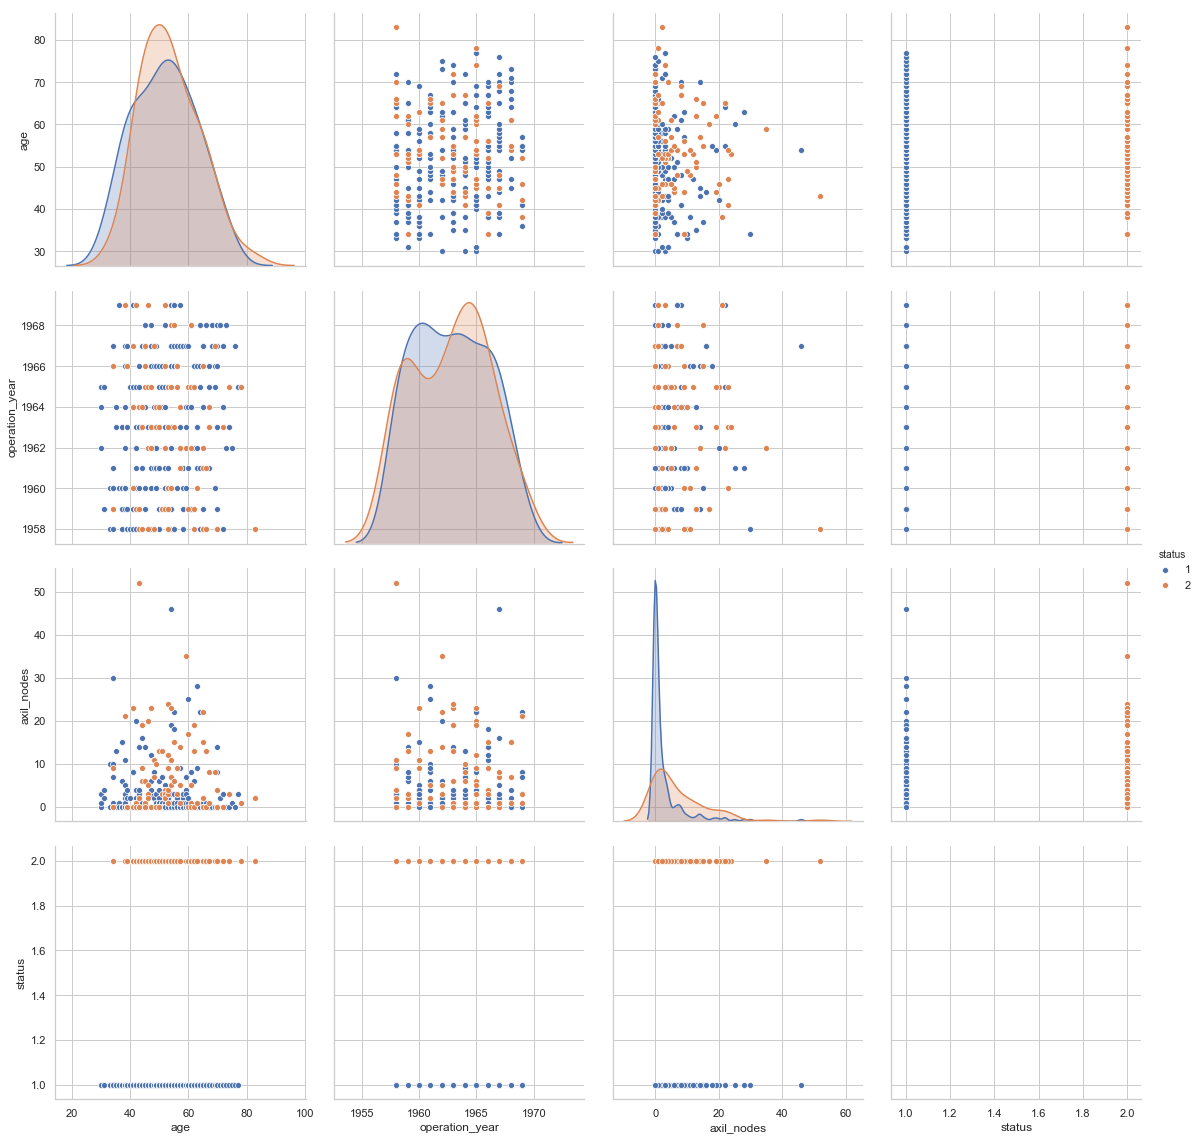

In [31]:
# PAIRWISE SCATTER PLOT BETWEEN FEATURES

sns.pairplot(data=haberman, hue='status', size=4)

### OBSERVATIONS : 

+ No of Axil_nodes seems to be the only reasonable measure the draw a classification based boundary b/w survived and not survived. 


+ All other features tend to show a bigger overlapp in their pdfs.


+ if-else based condition for the no_of_axillary_nodes(axil_nodes >8) can be used to classify survived and not_survived patients (incoming patient query point).  

## *FINAL OBSERVATIONS :*

+ *if-else based condition for the no_of_axillary_nodes(axil_nodes >8) can be used to classify survived and not_survived patients (incoming patient query point).*


+ *Patients having axil_nodes >8 tend to face no survival than as compared to patients having very less axillary_nodes.*


+ *Operations in the late 1970s led to less deaths may be because of better surgery advancements and treatments.*


+ *People over the age of ~80 stands at a higher chance of no survival after the operation.*